Chapter 15

# 估算圆周率
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

该代码使用蒙特卡罗方法来估计 $\pi$ 的值，并展示估计值随着样本数量增加的收敛情况。具体步骤如下：

1. **蒙特卡罗估计 $\pi$**：代码首先生成 500 个二维均匀分布的随机点 $(x, y)$，其范围为 $[-1, 1] \times [-1, 1]$。对于每个点，计算其与原点的距离 $\sqrt{x^2 + y^2}$。如果该距离小于 1，则该点位于单位圆内。

2. **估算 $\pi$**：单位圆的面积为 $\pi$，单位正方形的面积为 4，因此单位圆内点的比例 $\frac{\text{圆内点数}}{\text{总点数}}$ 可以近似为 $\frac{\pi}{4}$。从而得到 $\pi$ 的估计值：
   $$
   \hat{\pi} = 4 \times \frac{\text{圆内点数}}{\text{总点数}}
   $$

3. **图形可视化**：在图形中绘制单位圆，并将圆内和圆外的随机点分别标记为蓝色和红色，以便可视化地展示圆内点的分布。

4. **定义估计 $\pi$ 的函数**：定义函数 `est_pi(n)`，接受参数 $n$（即随机点数）并返回相应的 $\pi$ 的估计值。此函数生成 $n$ 个随机点并计算圆内点的比例来估计 $\pi$。

5. **观察估计值的收敛性**：定义一个包含从 $1000$ 到 $100000$ 间隔的数组 `n_array`，对应样本数量的不同取值。对于每一个 $n$ 值，调用 `est_pi(n)`，并记录 $\pi$ 的估计值。最后，使用半对数图 `semilogx` 展示 $\pi$ 的估计值随样本数量 $n$ 的变化。

6. **显示收敛性**：通过红线标记真实的 $\pi$ 值，随着 $n$ 增加，可以看到估计值趋向于 $\pi$。

In [1]:
import numpy as np  # 导入数值计算库numpy
import matplotlib.pyplot as plt  # 导入绘图库matplotlib

In [2]:
# 生成随机点
X = np.random.uniform(-1, 1, size=(500, 2))  # 在范围[-1, 1]内生成500个随机二维点
x = X[:, 0]  # 提取x坐标
y = X[:, 1]  # 提取y坐标

# 判断点是否在单位圆内
masks = np.sqrt(x**2 + y**2) < 1  # 计算到圆心的距离，并判断是否小于1

# 估计π值
pi_est = 4 * sum(masks) / len(x)  # 使用在圆内的点比例乘以4估算π值

(-1.0, 1.0)

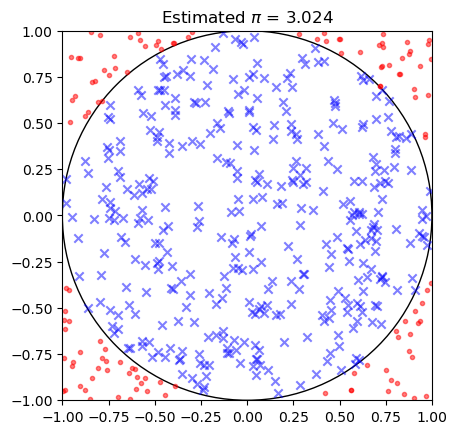

In [3]:
# 绘制图形
fig, ax = plt.subplots()  # 创建绘图窗口

# 绘制单位圆
circ = plt.Circle((0, 0), radius=1, edgecolor='k', facecolor='None')  # 定义单位圆
ax.add_patch(circ)  # 添加单位圆到图形中

# 绘制圆内的点
plt.scatter(x[masks], y[masks], marker="x", alpha=0.5, color='b')  # 使用蓝色“x”表示圆内的点

# 绘制圆外的点
plt.scatter(x[~masks], y[~masks], marker=".", alpha=0.5, color='r')  # 使用红色点表示圆外的点
plt.axis('scaled')  # 设置坐标轴比例
plt.title(r'Estimated $\pi$ = %1.3f' % (pi_est))  # 标题中显示估计的π值
plt.xlim(-1, 1)  # 设置x轴范围
plt.ylim(-1, 1)  # 设置y轴范围

In [4]:
# 定义估计π的函数
def est_pi(n):  
    # 生成n个随机点并估算π值
    X = np.random.uniform(-1, 1, size=(int(n), 2))  # 生成随机二维点
    x = X[:, 0]  # 提取x坐标
    y = X[:, 1]  # 提取y坐标
    
    masks = np.sqrt(x**2 + y**2) < 1  # 判断点是否在单位圆内
    pi_est = 4 * sum(masks) / len(x)  # 估算π值
    
    return pi_est  # 返回估算的π值

In [5]:
# 定义样本数量的范围
n_array = np.linspace(1000, 1000 * 100, 100)  # 生成从1000到100000的样本数量数组

In [6]:
# 创建空数组存储每次估算的π值
est_pi_array = np.empty(len(n_array))  # 定义一个空数组用于存储π估计值

In [7]:
# 估计π值的收敛过程
i = 0  # 初始化索引
for n in n_array:  # 遍历样本数量数组
    pi_est = est_pi(n)  # 估算当前样本数量下的π值
    est_pi_array[i] = pi_est  # 存储估算的π值
    i = i + 1  # 更新索引

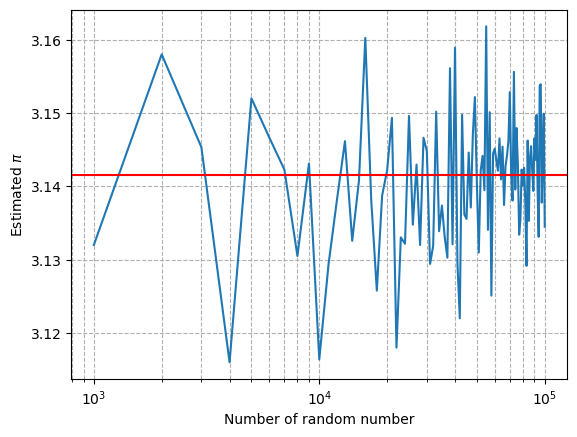

In [8]:
# 绘制收敛图
fig, ax = plt.subplots()  # 创建绘图窗口
plt.semilogx(n_array, est_pi_array)  # 绘制样本数量与π估计值的关系
plt.xlabel("Number of random number")  # 设置x轴标签
plt.ylabel(r"Estimated $\pi$")  # 设置y轴标签
plt.axhline(np.pi, color="r")  # 添加真实π值的水平线

plt.grid(True, which="both", ls="--")  # 设置网格